# 🛍️ Mall Customer Segmentation Using CRISP-DM


This notebook walks through the CRISP-DM process (Cross-Industry Standard Process for Data Mining) using a mall customer dataset.  
The business goal is to perform customer segmentation to inform targeted marketing strategies.


## 1. 📘 Business Understanding


**Goal:** Understand the business problem and define objectives.

**Scenario:**  
A mall wants to enhance its marketing strategy by identifying different customer groups.  
Customer segmentation can help in targeting customers more effectively by tailoring promotions, product offerings, and services.

**Data Science Objective:**  
Use clustering techniques to group similar customers based on features such as age, income, and spending score.


## 2. 📊 Data Understanding

In [1]:

import pandas as pd

import os
import warnings

# Fix for KMeans MKL memory leak on Windows
os.environ["OMP_NUM_THREADS"] = "1"
warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv("Mall_Customers.csv")

# Preview data
df.head()


,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual_Income   200 non-null    int64 
 4   Spending_Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [3]:
df.describe()

,CustomerID,Age,Annual_Income,Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


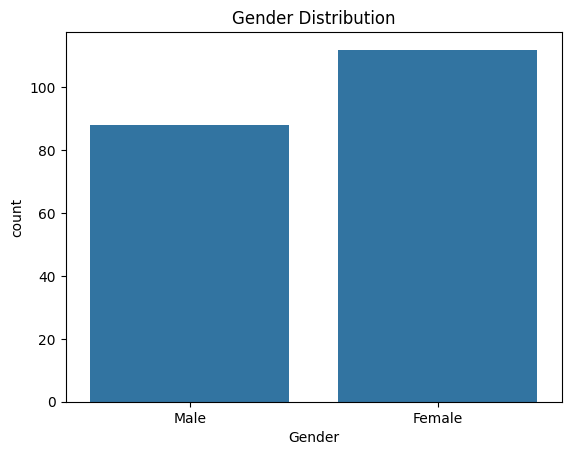

In [4]:

import seaborn as sns
import matplotlib.pyplot as plt

# Gender distribution
sns.countplot(x='Gender', data=df)
plt.title("Gender Distribution")
plt.show()


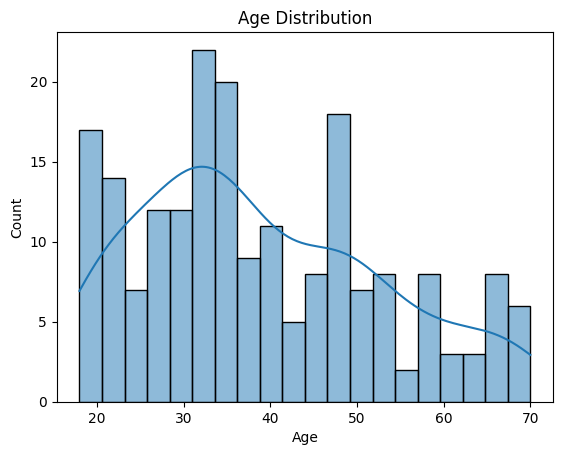

In [5]:

# Age distribution
sns.histplot(df['Age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()


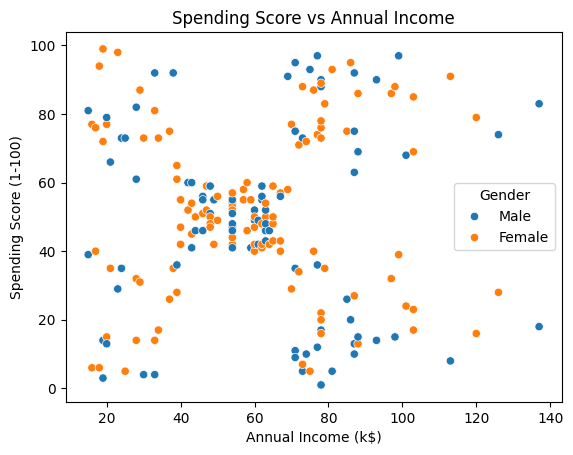

In [6]:

import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot of Spending Score vs Annual Income, colored by Gender
sns.scatterplot(data=df, x='Annual_Income', y='Spending_Score', hue='Gender')
plt.title("Spending Score vs Annual Income")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()



## 3. 🧹 Data Preparation


**Goal:** Clean and transform data into a format suitable for modeling.


In [7]:

# Drop unhelpful columns
df.drop(columns=["CustomerID"], inplace=True)

# Encode Gender
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Check for missing values
df.isnull().sum()


Gender            0
Age               0
Annual_Income     0
Spending_Score    0
dtype: int64

## 4. 🤖 Modeling


**Goal:** Apply clustering algorithm to group customers.

We'll use KMeans clustering and determine the optimal number of clusters using the Elbow Method.


In [8]:

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select features
features = df[['Age', 'Annual_Income', 'Spending_Score']]

# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


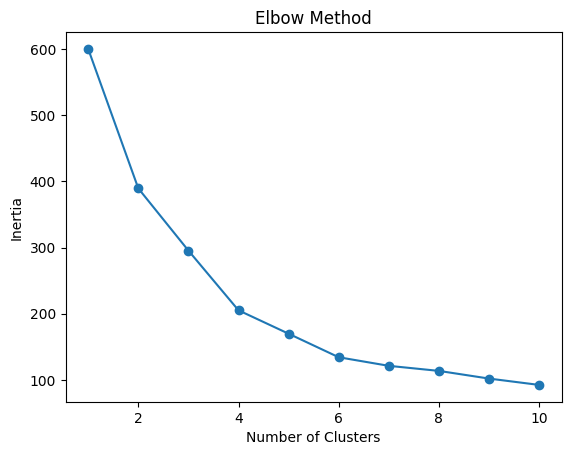

In [9]:

# Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


In [10]:

# Apply KMeans with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)


## 5. 📈 Evaluation


**Goal:** Interpret and validate the results of clustering.

We'll visualize the clusters and examine their characteristics.


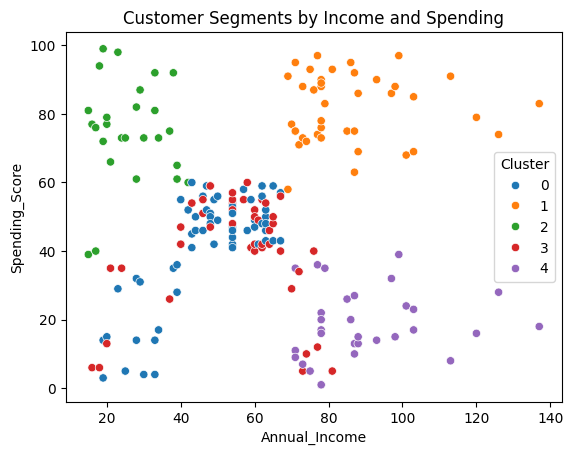

In [11]:

# Visualize clusters
sns.scatterplot(data=df, x='Annual_Income', y='Spending_Score', hue='Cluster', palette='tab10')
plt.title("Customer Segments by Income and Spending")
plt.show()


In [12]:

# Cluster Profiles
df.groupby('Cluster').mean()


,Gender,Age,Annual_Income,Spending_Score
Cluster,,,,
0,0.568966,55.275862,47.620690,41.706897
1,0.550000,32.875000,86.100000,81.525000
2,0.576923,25.769231,26.115385,74.846154
3,0.600000,26.733333,54.311111,40.911111
4,0.483871,44.387097,89.774194,18.483871


## 6. 🚀 Deployment


**Goal:** Save the model and output for future use in production systems.

We save the clustered dataset and the trained model.


In [13]:

import joblib

# Save clustered data
df.to_csv("Mall_Customers_Clustered.csv", index=False)

os.makedirs('data', exist_ok=True)
# Save model and scaler
joblib.dump(kmeans, 'kmeans_model.pkl')
joblib.dump(scaler, 'data/scaler.pkl')


['data/scaler.pkl']